In [1]:
# Imports
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_learning_curves(history, epochs=200, y_min=0):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)
#     plt.figure(2)
    plt.subplot(212)
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.plot(history.history['acc'], label = 'Training Accuracy')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

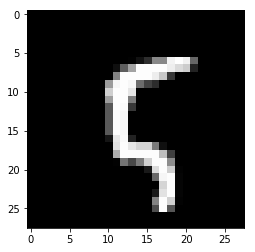

In [4]:
plt.imshow(x_train[100], cmap='gray')

In [5]:
def to_one_hot(array):
    num_unique = np.unique(array).shape[0]
    one_hot_array = np.zeros((array.shape[0], num_unique))
    one_hot_array[np.arange(array.shape[0]), array] = 1
    return one_hot_array

y_test = to_one_hot(y_test)
y_train = to_one_hot(y_train)

In [6]:
def normalize_features(array):
    return array / 255.0


def denormalize_features(array):
    return (np.round(array * 255)).astype(int)

In [7]:
from keras.layers import Conv3D

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s - loss: 0.4140 - acc: 0.8825 - val_loss: 0.2081 - val_acc: 0.9424
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.2136 - acc: 0.9390 - val_loss: 0.1536 - val_acc: 0.9553
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.1651 - acc: 0.9521 - val_loss: 0.1282 - val_acc: 0.9640
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.1384 - acc: 0.9589 - val_loss: 0.1163 - val_acc: 0.9671
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.1198 - acc: 0.9651 - val_loss: 0.1068 - val_acc: 0.9688
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.1081 - acc: 0.9675 - val_loss: 0.1030 - val_acc: 0.9713
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0989 - acc: 0.9704 - val_loss: 0.0987 - val_acc: 0.9708
Epoch 8/10
48000/48000 [==============================] - 2s 

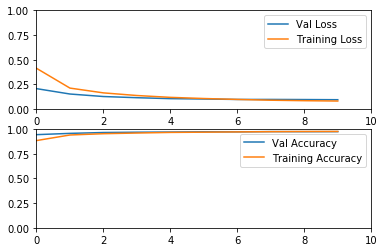

In [8]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)

sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
EPOCHS = 10

history = model.fit(normalize_features(x_train), y_train,
                    batch_size=100, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

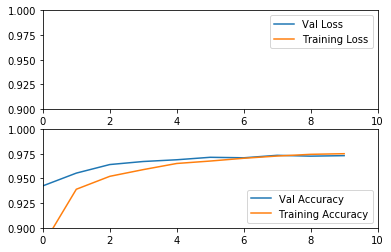

In [10]:
plot_learning_curves(history, EPOCHS, y_min=.9)

In [154]:
model.load_weights('mnist.model.best.hdf5')

In [11]:
dict([i for i in zip(model.metrics_names, model.evaluate(x_test, y_test))])

 9376/10000 [===========================>..] - ETA: 0s

{'acc': 0.97399999999999998, 'loss': 0.41615544418096545}

In [184]:
model.predict_proba(normalize_features(x_test[100:101]))

1/1 [==============================] - 0s


array([[  1.10884044e-04,   2.96025682e-04,   4.04190086e-03,
          1.42042001e-04,   8.39610075e-05,   1.85187382e-04,
          9.94636238e-01,   4.46925987e-05,   4.20725293e-04,
          3.84313171e-05]], dtype=float32)

# Can we do the same thing with CNNs?

### first try toy example from udacity

In [92]:
(x_train.shape[1], x_train.shape[2], 1)

(28, 28)

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 14, 14, 10)        100       
Total params: 100.0
Trainable params: 100
Non-trainable params: 0.0
_________________________________________________________________


In [87]:
filter_size = 3
num_filters = 32
prev_layer_depth = 3

num_filters * filter_size ** 2 * prev_layer_depth + num_filters

num_filters * (filter_size **2 * prev_layer_depth + 1)

896

### Now try against mnist numbers

In [111]:
x_train.shape

(60000, 28, 28)

In [128]:
from keras import backend as K

In [167]:
K.image_data_format()

'channels_last'

In [188]:
model = Sequential()
# model.add(Flatten(input_shape=x_train.shape[1:]))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(y_train.shape[1], activation='softmax'))
model.add(Conv2D(filters=10, kernel_size=5,
                 strides=2, padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1),
                 data_format='channels_last'))
# model.add(Dropout(.2))
model.add(Conv2D(filters=10, kernel_size=3,
                 strides=2, padding='valid',
                 activation='relu'))
# model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 14, 14, 10)        260       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 6, 6, 10)          910       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 10)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 360)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               36100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
__________

Mnist digit classifier.ipynb mnist.model.best.hdf5
cnn                          mnist.model.bestconv2d.hdf5
imdb                         naive_bayes_tutorial


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s - loss: 1.1623 - acc: 0.6433 - val_loss: 0.4202 - val_acc: 0.8883
Epoch 2/10
48000/48000 [==============================] - 10s - loss: 0.5444 - acc: 0.8296 - val_loss: 0.2798 - val_acc: 0.9264
Epoch 3/10
48000/48000 [==============================] - 10s - loss: 0.4066 - acc: 0.8741 - val_loss: 0.2154 - val_acc: 0.9405
Epoch 4/10
48000/48000 [==============================] - 10s - loss: 0.3274 - acc: 0.8990 - val_loss: 0.1752 - val_acc: 0.9494
Epoch 5/10
48000/48000 [==============================] - 10s - loss: 0.2811 - acc: 0.9124 - val_loss: 0.1491 - val_acc: 0.9570
Epoch 6/10
48000/48000 [==============================] - 12s - loss: 0.2431 - acc: 0.9257 - val_loss: 0.1315 - val_acc: 0.9623
Epoch 7/10
48000/48000 [==============================] - 11s - loss: 0.2179 - acc: 0.9338 - val_loss: 0.1147 - val_acc: 0.9666
Epoch 8/10
48000/48000 [==============================

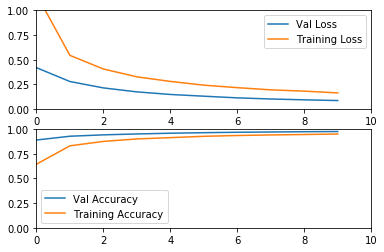

In [189]:
EPOCHS = 10
checkpointer = ModelCheckpoint(filepath='mnist.model.bestconv2d.hdf5',
                               verbose=1, save_best_only=True)
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalize_features(x_train).reshape(60000, 28, 28, 1),
                    y_train, batch_size=1000, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

In [ ]:
model.no